# Открыте файла

In [98]:
! pip install calculate_accuracy

ERROR: Could not find a version that satisfies the requirement calculate_accuracy (from versions: none)
ERROR: No matching distribution found for calculate_accuracy


In [89]:
import pandas as pd

data = pd.read_csv('transactions_data.csv')

#Если в файле нет заголовка или разделителем является другой символ (например, табуляция),
#то эти параметры можно указать при чтении файла

#data = pd.read_csv('power.csv', names = ['country', 'year', 'quantity', 'category'], sep = '\t')

data.head() # первые пять строк
data.tail(10) # указывает десять последних строк
len(data) # сколько строк
#data.info() # выводит инфу
data.shape   # количество строк и столбцов датафрейма 
(data.duplicated() == True).sum()# Проверка дубликатов в данных

0

# Для числовых столбцов можно сразу узнать более детальную статистику

In [ ]:
data.describe() #Для числовых столбцов можно сразу узнать более детальную статист

"""
count - число непустых ячеек
mean - среднее значение значений столбца
std - стандартное отклонение
min и max - минимальное и максимальное значение в столбце
25%, 50%, 75% - квантили
"""

# уникальные значения вообще принимает столбец

In [23]:
data['Month'].unique() # какие уникальные значения вообще принимает столбец категорий

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [24]:
len(data['Month'].unique()) #точное их число 

12

# сколько записей в датафрейме имеет каждое значение в столбце

In [28]:
data['Month'].value_counts() # сколько записей в датафрейме имеет каждое значение

11    8
5     8
12    7
9     6
4     6
7     5
6     5
10    4
2     4
8     3
3     2
1     2
Name: Month, dtype: int64

# Узнаем среднее знаение по столбцу 

In [33]:
data['Month'].mean() 
sum(data['Month']) / len(data)


7.25

# фильтровать датафрейм по столбцам и индексам 

In [42]:
country_stats = data.filter(items = ['Year', 'Month','Product'])  #позволяет фильтровать датафрейм по столбцам и индексам 
country_stats.head()  

,Year,Month,Product
0,2017,1,A1
1,2017,1,A2
2,2017,2,A1
3,2017,2,A4
4,2017,2,A5


In [44]:
average_level = data['Month'].mean()
average_level

data.query('Month > 7').head() 
# отфильтруем строки. 
#у которых значение столбца Month превышает значение 7



,Year,Month,ID,Product,Amount,Price,Total,Cost
32,2017,8,t033,A5,2,5175,10350,1200
33,2017,8,t034,_3,2,1265,2530,1000
34,2017,8,t035,_5,1,5175,5175,800
35,2017,9,t036,_3,3,1265,3795,2400
36,2017,9,t037,_5,1,5175,5175,200


In [49]:
'Month > {}'.format(average_level)   # удобнее через сортировать через format
above_average = country_stats.query('Month > {}'.format(average_level))  
above_average.head(10)

,Year,Month,Product
32,2017,8,A5
33,2017,8,_3
34,2017,8,_5
35,2017,9,_3
36,2017,9,_5
37,2017,9,_8
38,2017,9,_4
39,2017,9,_2
40,2017,9,_5
41,2017,10,_8


In [47]:
data[ data['Month'] > average_level ].head(10)# показать значение таблицы где значение по заданному стобцу > среднего

,Year,Month,ID,Product,Amount,Price,Total,Cost
32,2017,8,t033,A5,2,5175,10350,1200
33,2017,8,t034,_3,2,1265,2530,1000
34,2017,8,t035,_5,1,5175,5175,800
35,2017,9,t036,_3,3,1265,3795,2400
36,2017,9,t037,_5,1,5175,5175,200
37,2017,9,t038,_8,1,3760,3760,700
38,2017,9,t039,_4,2,8618,17236,2400
39,2017,9,t040,_2,8,1896,15168,1000
40,2017,9,t041,_5,5,5175,25875,800
41,2017,10,t042,_8,3,3760,11280,800


#  str.contains('подстрока'). Он позволяет оставить только те строки, которые содержат слово 'подстрока'.

In [58]:
len(data.Month.unique())

#используем метод str.contains('подстрока'). Он позволяет оставить только те строки, которые содержат слово 'подстрока'.
#Параметр case=False означает, что поиск будет производиться без учета регистра букв:
data[ data['Month'].str.contains('ff', case=False) ]['Month'].unique() 


AttributeError: Can only use .str accessor with string values!

# когда много условий

#Если требуется выполнение хотя бы одного условия, то используем оператор |.
#data[ (условие1) | (условие 2) | (условие 3) ... 
#Если требуется одновременное выполнение условий, то вместо | ставим &:
#data[ (условие1) & (условие 2) & (условие 3) ... ]

filtered_countries = data[ (data['country']=='Russian Federation') | (data['country']=='Belarus') ]
filtered_countries.head()

filtered_countries = data[ (data['Month']==2) | (data['Year']==2017) ]
filtered_countries.head()

# ФИЛЬТР НА СТРОКИ И СТОЛБЦЫ / метод loc

In [70]:
#ФИЛЬТР НА СТРОКИ И СТОЛБЦЫ
#метод loc дополняет предыдущий способ фильтрации возможностью добавлять условия на столбцы.
data.loc[1:4, ['Year', 'Month','Cost']] # нужное количество строк и нужные стобцы
# или требуется получить значения столбца для определенного фильтра
data.loc[data['Month'] == 7, 'Year'] # 


27    2017
28    2017
29    2017
30    2017
31    2017
Name: Year, dtype: int64

# Сортировка данных  и последующая группировка / метод groupby


In [93]:
dats_groupped = data.sort_values('Year').groupby('Month')
dats_groupped.head()


,Year,Month,ID,Product,Amount,Price,Total,Cost
0,2017,1,t001,A1,7,2904,20328,1200
32,2017,8,t033,A5,2,5175,10350,1200
33,2017,8,t034,_3,2,1265,2530,1000
34,2017,8,t035,_5,1,5175,5175,800
35,2017,9,t036,_3,3,1265,3795,2400
36,2017,9,t037,_5,1,5175,5175,200
37,2017,9,t038,_8,1,3760,3760,700
38,2017,9,t039,_4,2,8618,17236,2400
39,2017,9,t040,_2,8,1896,15168,1000
41,2017,10,t042,_8,3,3760,11280,800


# СОРТИРОВКА ПО СТОЛБЦУ / метод sort_values

In [74]:
#СОРТИРОВКА ПО СТОЛБЦУ
# сортировки значений по столбцам в Pandas используется метод sort_values
data.sort_values(by='Month').head()

data.sort_values(by='Month', ascending=False) #по убыванию

#СОРТИРОВКА ПО НЕСКОЛЬКИМ СТОЛБЦАМ
data.sort_values(by=['Month', 'Total'], ascending=[True, True]).head()  

,Year,Month,ID,Product,Amount,Price,Total,Cost
1,2017,1,t002,A2,2,1896,3792,1100
0,2017,1,t001,A1,7,2904,20328,1200
3,2017,2,t004,A4,1,8618,8618,4200
5,2017,2,t006,_6,4,3500,14000,200
2,2017,2,t003,A1,5,2904,14520,1200


# Переназначить переменной data новое значение:


In [77]:
#. Переназначить переменной data новое значение:
data = data.sort_values(by=['Month', 'Year', 'Cost'], ascending=[True, True, False])
data
#Или использовать параметр inplace 
data.sort_values(by=['Month', 'Year', 'Cost'], ascending=[True, True, False], inplace=True)
data


,Year,Month,ID,Product,Amount,Price,Total,Cost
0,2017,1,t001,A1,7,2904,20328,1200
1,2017,1,t002,A2,2,1896,3792,1100
3,2017,2,t004,A4,1,8618,8618,4200
2,2017,2,t003,A1,5,2904,14520,1200
4,2017,2,t005,A5,3,5175,15525,500
5,2017,2,t006,_6,4,3500,14000,200
7,2017,3,t008,_5,2,5175,10350,1200
6,2017,3,t007,_3,6,1265,7590,200
9,2017,4,t010,_4,2,8618,17236,3400
12,2017,4,t013,_8,3,3760,11280,1200


# Сортируем таблицу и считаем сумму
каково суммарное
потребление стран Прибалтики  категорий 4, 12 и 21 за период с 2005 по 2010 года
Узнать есть ли в столбце данные значения

In [81]:
# посчитать заданную метрику по данным файла power.csv: каково суммарное
# потребление стран Прибалтики  категорий 4, 12 и 21 за период с 2005 по 2010 года
data = pd.read_csv('power.csv')
# Выясним, как в датафрейме называются Литва, Латвия и Эстония
countries = [ x for x in data['country'].unique() if 'Lit' in x or 'Lat' in x or 'Est' in x]
countries

['Lithuania', 'Latvia', 'Estonia']

In [82]:
# Оставляем только те строки датафрейма, которые содержат 'Lithuania', 'Latvia', 'Estonia'
filtered_countries = data[ (data['country']=='Lithuania') | (data['country']=='Latvia')
                         | (data['country'] == 'Estonia')]

# Оставьте в датафрейме только те строки, 
# год которых приходится на период с 2005 по 2010 включительно
filtered_countries = filtered_countries[(filtered_countries['year'] >= 2005) & 
                                        (filtered_countries['year'] <= 2010)]
# Удалим строки со значением столбца quantity < 0
filtered_countries = filtered_countries[filtered_countries['quantity'] >= 0]

# Оставим в датафрейме только строки со значением столбца category, равным 4, 12 или 21. 
filtered_countries = filtered_countries[(filtered_countries['category'] == 4) |
                                        (filtered_countries['category'] == 12) |
                                        (filtered_countries['category'] == 21)]

# Посчитаум сумму столбца quantity.
filtered_countries['quantity'].sum()

240580.0

# чтобы сохранить наш DataFrame со странами


In [84]:
#чтобы сохранить наш DataFrame со странами
data = data.sort_values(by=['country', 'year', 'quantity'], ascending=[True, True, False])
data.to_csv('data_21.csv')


# заполнить пропущенные значения / fillna

In [ ]:
data = data.fillna(data.median(axis=0), axis=0)

# сводные таблицы строятся через метод .pivot_table.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-02-23 to 2017-02-22
Data columns (total 6 columns):
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Volume       1258 non-null int64
Adj Close    1258 non-null float64
dtypes: float64(5), int64(1)
memory usage: 68.8 KB
None


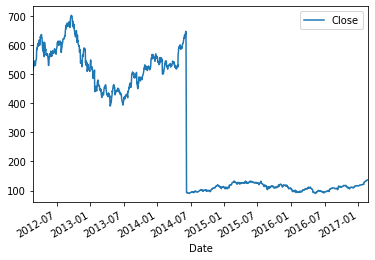

In [5]:
# временые ряды      pandas.to_datetime.

df = pd.read_csv('apple.csv', index_col='Date', parse_dates=True)
df = df.sort_index()
print(df.info())

df.loc['2012-Feb', 'Close'].mean() #узнаем среднюю цену акции (mean) на закрытии (Close):

df.loc['2012-Feb':'2015-Feb', 'Close'].mean() 

#среднюю цену закрытия по неделям
df.resample('W')['Close'].mean() #Resampling мощный инструмент при работе с временными рядами (time series), помогающий переформировать выборку так, как удобно вам. 
#Метод resample первым аргументом принимает строку rule


import matplotlib.pyplot as plt

new_sample_df = df.loc['2012-Feb':'2017-Feb', ['Close']]
new_sample_df.plot()
#plt.show()



